In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_class_distribution(data_input, dataset_name=None, save_path=None):
    """
    Creates a pie chart showing the distribution of the 'paired' classes.
    
    Parameters:
    -----------
    data_input : str or pd.DataFrame
        Either a file path to a CSV file or a pandas DataFrame
    dataset_name : str, optional
        Name of the dataset (e.g., 'Train', 'Test', 'Validation')
        If None and data_input is a string, will try to extract from filename
    save_path : str, optional
        If provided, saves the figure to this path
        
    Returns:
    --------
    None, displays the pie chart
    """
    # Load data if file path is provided
    if isinstance(data_input, str):
        if not os.path.exists(data_input):
            raise FileNotFoundError(f"File not found: {data_input}")
        df = pd.read_csv(data_input)
        
        # Try to extract dataset name from filename otherwise
        if dataset_name is None:
            base_filename = os.path.basename(data_input)
            if 'train' in base_filename.lower():
                dataset_name = 'Train'
            elif 'test' in base_filename.lower():
                dataset_name = 'Test'
            elif 'val' in base_filename.lower() or 'validation' in base_filename.lower():
                dataset_name = 'Validation'
            else:
                dataset_name = 'Dataset'
    elif isinstance(data_input, pd.DataFrame):
        df = data_input
        # Use default name if not provided
        if dataset_name is None:
            dataset_name = 'Dataset'
    else:
        raise TypeError("data_input must be either a file path (str) or a pandas DataFrame")
    
    # Check if 'paired' column exists
    if 'paired' not in df.columns:
        raise ValueError("DataFrame does not contain a 'paired' column")
    
    # Count the values in the 'paired' column
    class_counts = df['paired'].value_counts()
    
    # Map the values to more descriptive labels (assuming 0 and 1)
    labels = [f'Unpaired ({0})' if idx == 0 else f'Paired ({1})' for idx in class_counts.index]
    
    # Create the pie chart
    plt.figure(figsize=(10, 7))
    
    # Use a consistent color palette
    colors = ['#FF6B6B', '#4ECDC4']  # Red for unpaired, teal for paired
    
    # Create pie chart with percentage labels - simple, flat design
    plt.pie(
        class_counts, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors,
        explode=None,  # No explode effect
        shadow=False,  # No shadow effect
        textprops={'fontsize': 12}
    )
    
    # Add title with dataset size information
    plt.title(
        f'Class Distribution in {dataset_name} Set\n'
        f'Total Samples: {len(df):,}',
        fontsize=16, 
        pad=20
    )
    
    # Add legend with absolute counts
    legend_labels = [f'{label}: {count:,}' for label, count in zip(labels, class_counts)]
    plt.legend(legend_labels, loc='best', fontsize=12)
    
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle
    
    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to {save_path}")
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nClass Distribution Summary for {dataset_name} Set:")
    print(f"Total samples: {len(df):,}")
    for idx, count in class_counts.items():
        label = 'Paired' if idx == 1 else 'Unpaired'
        percentage = (count / len(df)) * 100
        print(f"{label} samples: {count:,} ({percentage:.1f}%)")

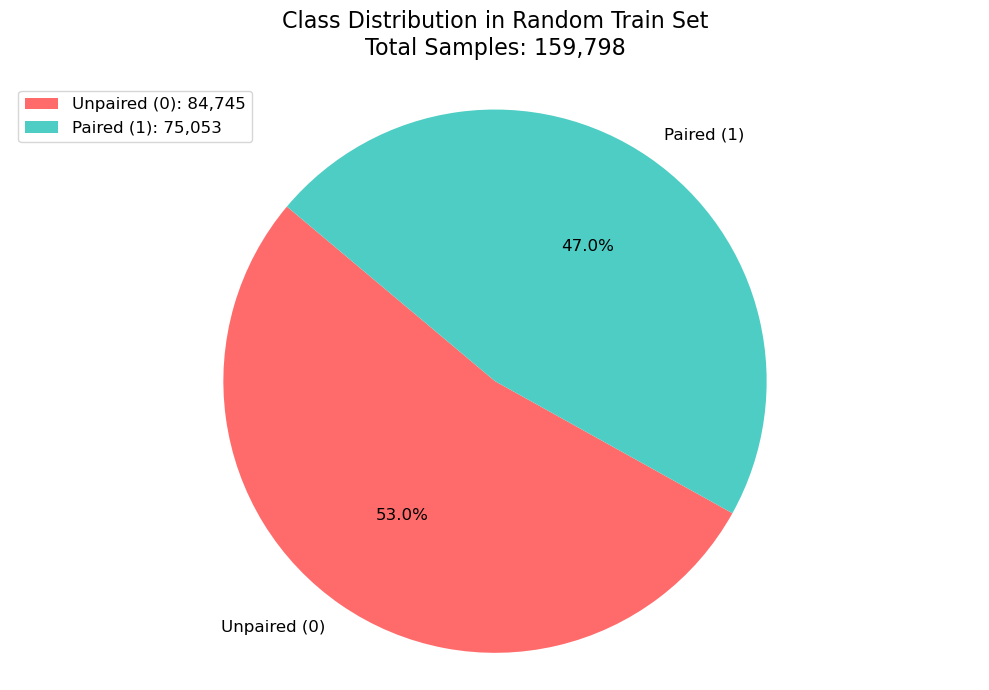


Class Distribution Summary for Random Train Set:
Total samples: 159,798
Unpaired samples: 84,745 (53.0%)
Paired samples: 75,053 (47.0%)


In [3]:
plot_class_distribution('train_agg_final_dataset_random.csv', dataset_name='Random Train')

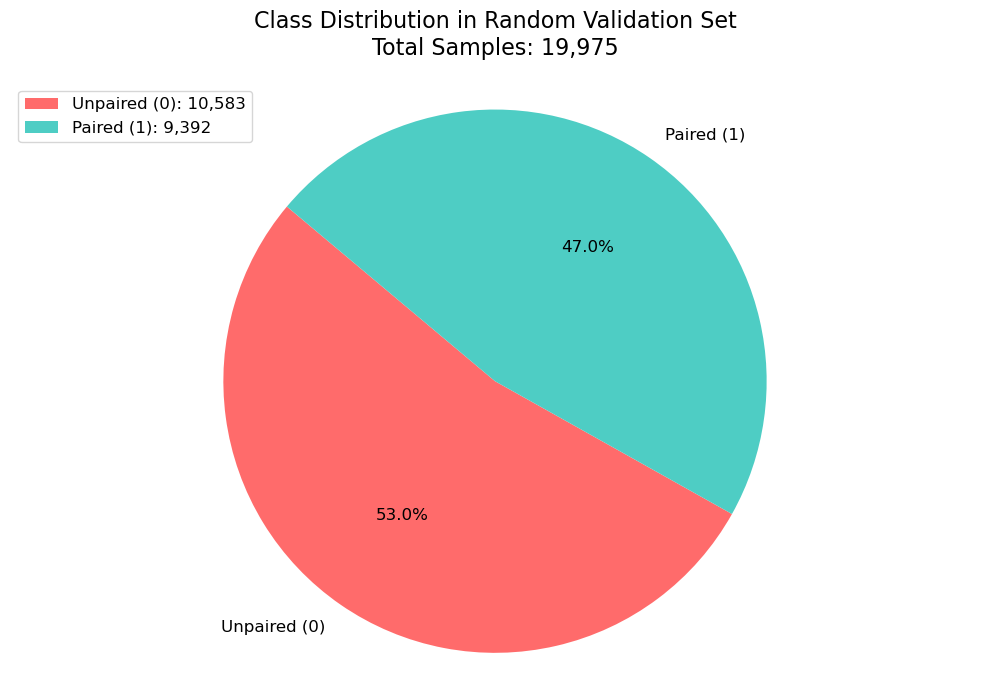


Class Distribution Summary for Random Validation Set:
Total samples: 19,975
Unpaired samples: 10,583 (53.0%)
Paired samples: 9,392 (47.0%)


In [8]:
plot_class_distribution('val_agg_final_dataset_random.csv', dataset_name='Random Validation')

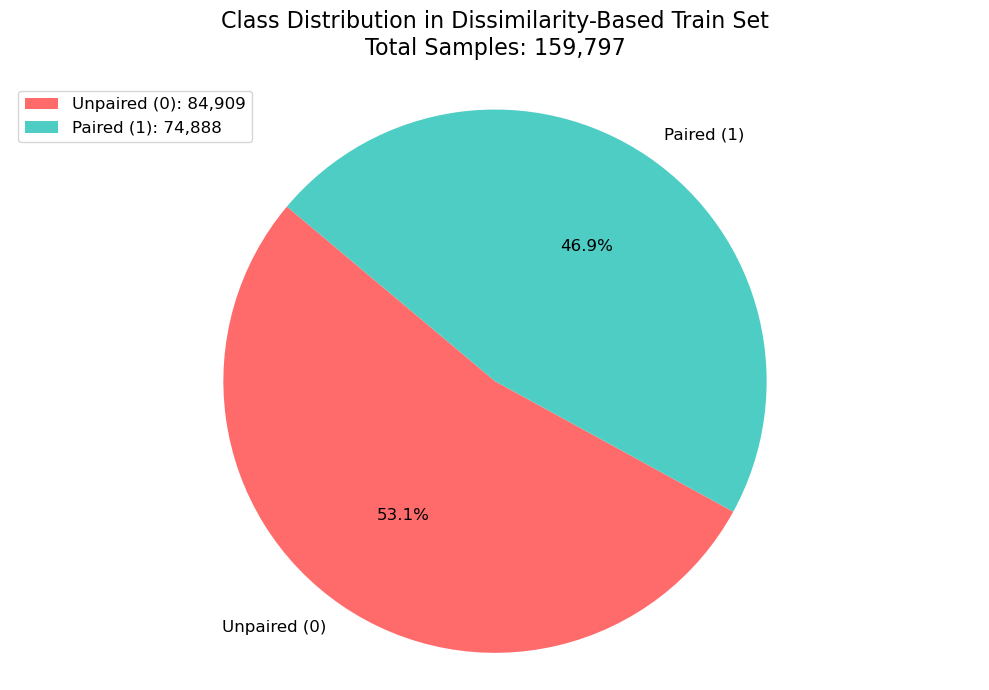


Class Distribution Summary for Dissimilarity-Based Train Set:
Total samples: 159,797
Unpaired samples: 84,909 (53.1%)
Paired samples: 74,888 (46.9%)


In [4]:
plot_class_distribution('train_agg_final_dataset_dissimilar.csv', dataset_name='Dissimilarity-Based Train')

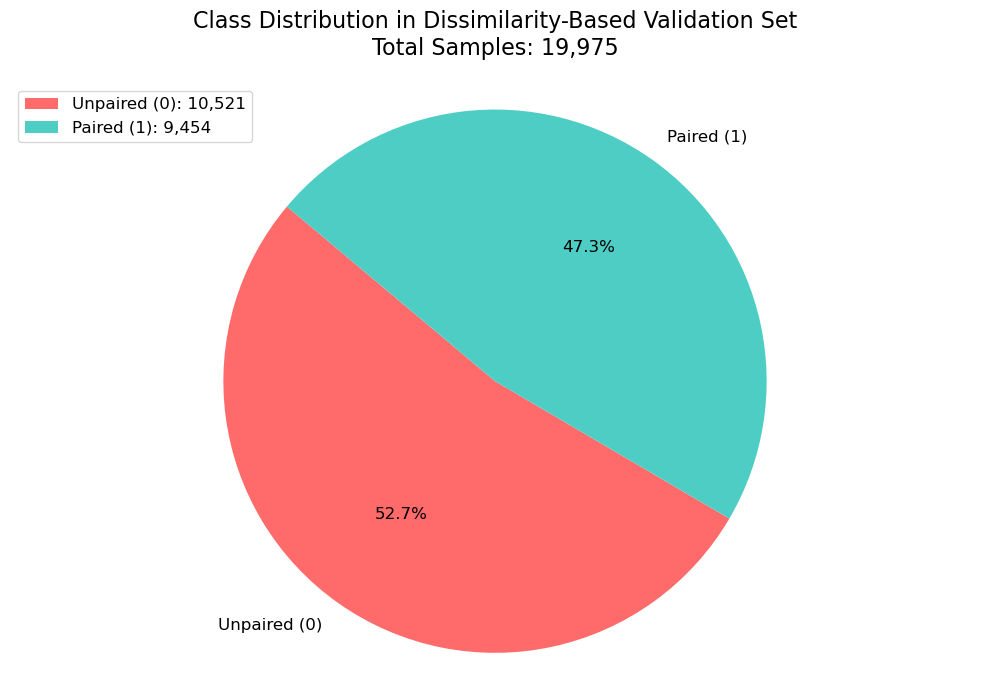


Class Distribution Summary for Dissimilarity-Based Validation Set:
Total samples: 19,975
Unpaired samples: 10,521 (52.7%)
Paired samples: 9,454 (47.3%)


In [7]:
plot_class_distribution('val_agg_final_dataset_dissimilar.csv', dataset_name='Dissimilarity-Based Validation')

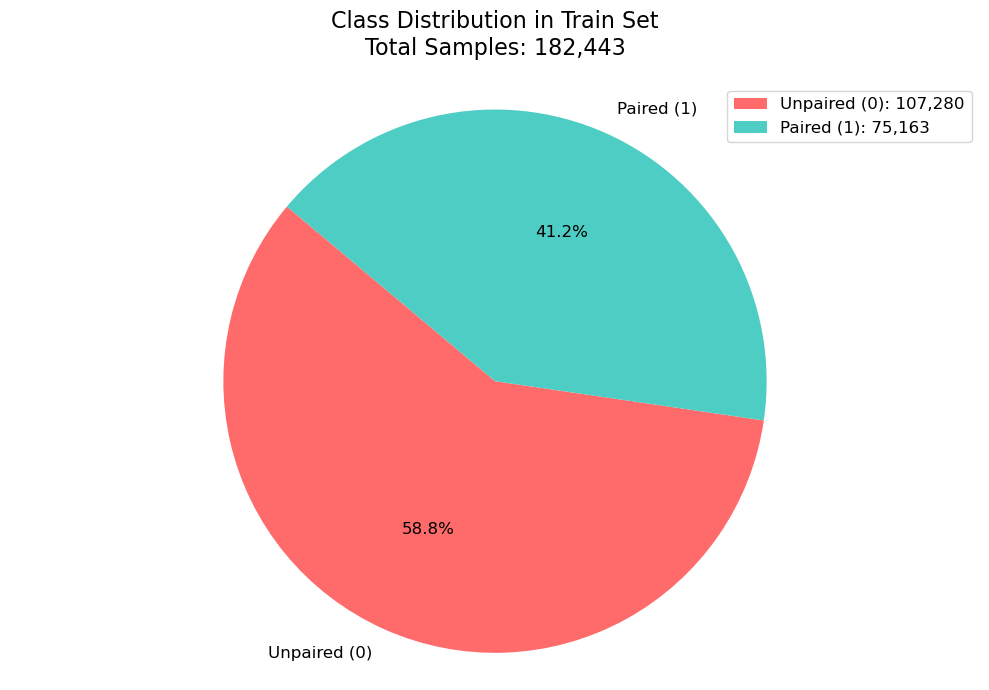


Class Distribution Summary for Train Set:
Total samples: 182,443
Unpaired samples: 107,280 (58.8%)
Paired samples: 75,163 (41.2%)


In [14]:
plot_class_distribution('train_agg_new.csv', dataset_name='Train')

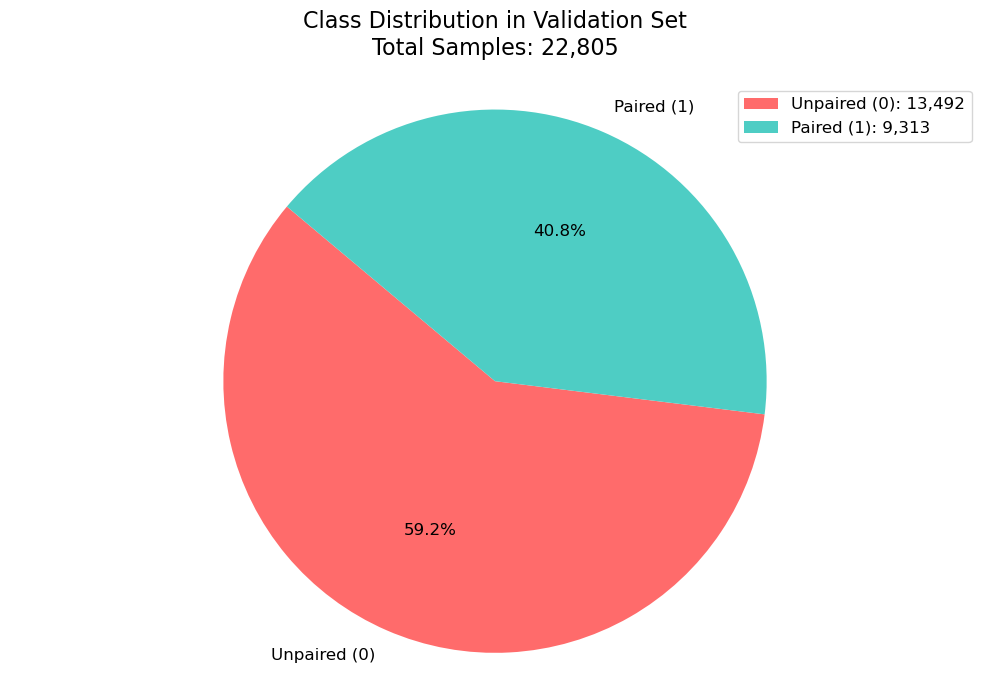


Class Distribution Summary for Validation Set:
Total samples: 22,805
Unpaired samples: 13,492 (59.2%)
Paired samples: 9,313 (40.8%)


In [11]:
plot_class_distribution('val_agg_new.csv', dataset_name='Validation')

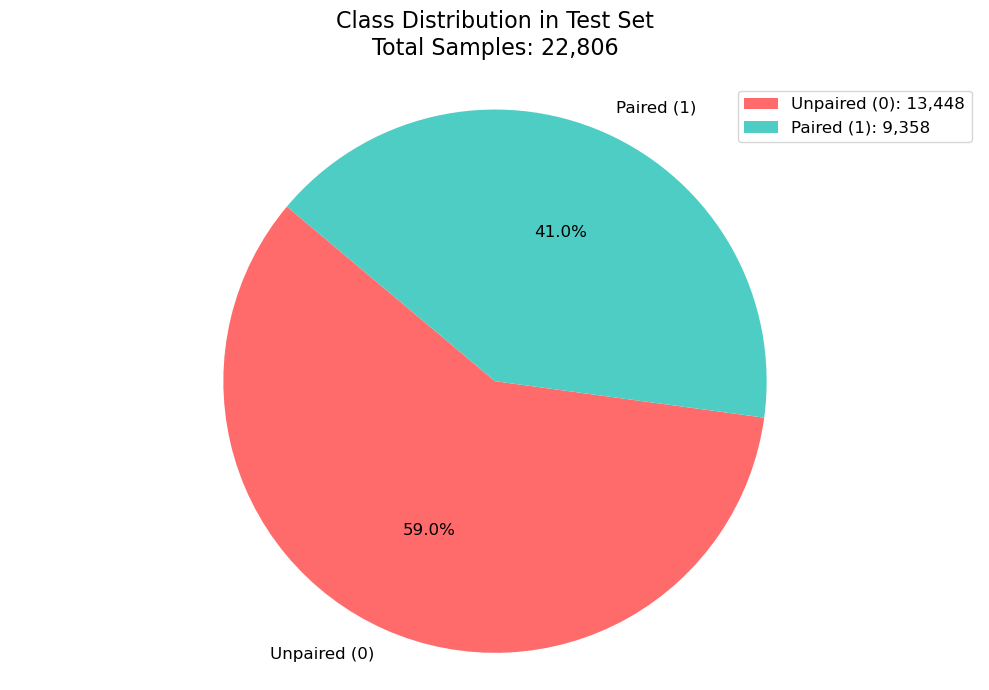


Class Distribution Summary for Test Set:
Total samples: 22,806
Unpaired samples: 13,448 (59.0%)
Paired samples: 9,358 (41.0%)


In [13]:
plot_class_distribution('test_agg_new.csv', dataset_name='Test')